In [1]:
import gensim
import re
import pandas as pd
import matplotlib.pyplot as plt
from gensim import corpora
from tqdm import tqdm
from gensim.models import CoherenceModel
from nltk.tokenize import word_tokenize

C:\Users\MinchanKim\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [2]:
data = pd.read_pickle("data_all_pre.pkl")
data

,rating,productID,reviewText,summary,style,reviewTotal,reviewWord
0,2,7106116521,"I agree with the other review, the opening is ...","I agree with the other review, the opening is ...",NaN,"I agree with the other review, the opening is ...","[review, opening, small, hook, expensive, earr..."
1,4,B00007GDFV,Received the case in less than a week...was ve...,Great bargain,NaN,Received the case in less than a week...was ve...,"[case, less, week, satisfied, product, problem..."
2,5,B00007GDFV,I had been looking for a replacement for a cig...,Better than I expected,{'Color:': ' Black'},I had been looking for a replacement for a cig...,"[replacement, cigarette, case, year, several, ..."
3,1,B00008JOQI,"We tried these shirts in the pinpoint fabric, ...",Paul Fredrick dress shirt VERY hard to iron,NaN,"We tried these shirts in the pinpoint fabric, ...","[shirt, pinpoint, fabric, bad, wrinkled, shirt..."
4,3,B00008JOQI,The fit was a bit awkward for my athletic body...,Fabric quality overall is good.,"{'Size:': ' 16.5 - 37', 'Color:': ' Grey'}",The fit was a bit awkward for my athletic body...,"[fit, bit, awkward, athletic, body, type, fabr..."
...,...,...,...,...,...,...,...
79895,1,B01HJEOBUO,"Cute print, material as expected, seams ok, bu...",Dont bother,NaN,"Cute print, material as expected, seams ok, bu...","[cute, print, material, seam, small, size, bre..."
79896,2,B01HJEOBUO,Really sad that the sizing is so inconsistent....,Inconsistent sizing on different styles!,NaN,Really sad that the sizing is so inconsistent....,"[sad, sizing, inconsistent, black, pink, one, ..."
79897,3,B01HJEOC9E,"The dress is pretty and fits on top, which gre...",Barely presentable....,NaN,"The dress is pretty and fits on top, which gre...","[dress, pretty, top, f, large, bottom, portion..."
79898,4,B01HJHTH5U,This dress is quite sexy with the plunging nec...,if your tall...wear flats with this dress,NaN,This dress is quite sexy with the plunging nec...,"[dress, sexy, neckline, person, picture, frien..."


In [3]:
data['reviewWord'][0][1] #단어가 똑바로 출력되는지 확인

'opening'

In [4]:
dictionary = corpora.Dictionary(data['reviewWord']) #단어를 숫자로
corpus = [dictionary.doc2bow(text) for text in data['reviewWord']] #문서를 숫자로 bow = bagofwords

In [5]:
print(dictionary[66])

overall


In [6]:
len(dictionary)

27177

In [7]:
#토픽 별로 어떤 단어가 출력되는지 확인
NUM_TOPICS = 20
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
topics = ldamodel.print_topics(num_words=10)
for topic in topics:
    print(topic)

(0, '0.070*"shoe" + 0.044*"pair" + 0.040*"time" + 0.036*"day" + 0.034*"first" + 0.034*"foot" + 0.023*"sock" + 0.021*"boot" + 0.021*"comfortable" + 0.016*"hour"')
(1, '0.188*"quality" + 0.151*"good" + 0.099*"price" + 0.071*"great" + 0.028*"nice" + 0.020*"poor" + 0.020*"high" + 0.018*"print" + 0.018*"product" + 0.016*"excellent"')
(2, '0.198*"picture" + 0.071*"disappointed" + 0.066*"nothing" + 0.029*"pic" + 0.028*"look" + 0.026*"smell" + 0.022*"earring" + 0.022*"wrong" + 0.021*"sheer" + 0.017*"awful"')
(3, '0.207*"dress" + 0.051*"top" + 0.040*"suit" + 0.025*"bottom" + 0.023*"bra" + 0.021*"beautiful" + 0.020*"fit" + 0.018*"material" + 0.017*"great" + 0.015*"perfect"')
(4, '0.046*"comfortable" + 0.042*"soft" + 0.034*"material" + 0.034*"fabric" + 0.030*"pant" + 0.029*"great" + 0.025*"nice" + 0.021*"fit" + 0.020*"perfect" + 0.015*"good"')
(5, '0.137*"cute" + 0.094*"short" + 0.062*"super" + 0.050*"skirt" + 0.032*"little" + 0.032*"length" + 0.021*"sexy" + 0.019*"long" + 0.019*"waist" + 0.017*"

In [8]:
RANDOM_STATE = 42

In [9]:
#topic 수를 정하기 위해 coherence와 perplexity 측정
#coherence(응집도)는 높을수록, perplexity(혼잡도)는 낮을수록 좋음
coherence_values = []
perplexity_values = []

for i in tqdm(range(2, 31)):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, random_state = RANDOM_STATE, num_topics=i, id2word = dictionary, passes = 30)
    coherence_model = CoherenceModel(model=ldamodel, texts=data['reviewWord'], dictionary=dictionary)
    coherence = coherence_model.get_coherence()
    coherence_values.append(coherence)
    perplexity_values.append(ldamodel.log_perplexity(corpus))

100%|███████████████████████████████████████████████████████████████████████████████| 29/29 [4:20:45<00:00, 539.51s/it]


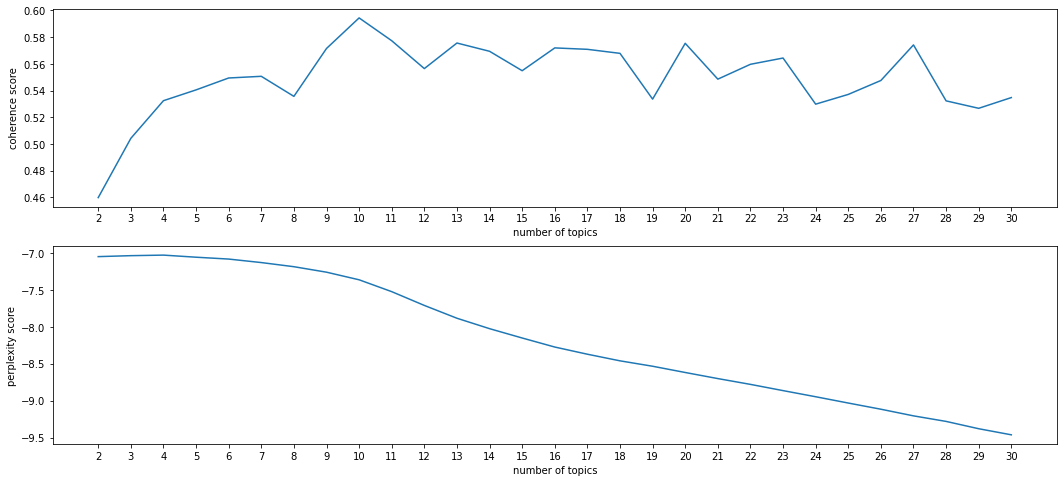

In [10]:
f, ax = plt.subplots(2,1, figsize = (18,8))
x = range(2, 31)
xticks = range(2, 31)

ax[0].plot(x, coherence_values)
ax[0].set_xlabel("number of topics")
ax[0].set_ylabel("coherence score")
ax[0].set_xticks(xticks)

ax[1].plot(x, perplexity_values)
ax[1].set_xlabel("number of topics")
ax[1].set_ylabel("perplexity score")
ax[1].set_xticks(xticks)

plt.show()

In [17]:
NUM_TOPICS = 20
ldamodel = gensim.models.ldamodel.LdaModel(corpus, random_state = RANDOM_STATE, num_topics = NUM_TOPICS, id2word=dictionary, passes=30)
topics = ldamodel.print_topics(num_words=20)
for topic in topics:
    print(topic)                                                                                                                                                                                                                                                 

(0, '0.120*"beautiful" + 0.053*"ring" + 0.041*"love" + 0.039*"compliment" + 0.022*"gold" + 0.022*"many" + 0.021*"gorgeous" + 0.018*"real" + 0.018*"perfect" + 0.018*"jewelry" + 0.017*"stone" + 0.014*"price" + 0.013*"lot" + 0.012*"elegant" + 0.011*"wedding" + 0.010*"finger" + 0.010*"piece" + 0.009*"set" + 0.009*"silver" + 0.009*"nice"')
(1, '0.072*"top" + 0.061*"cute" + 0.033*"suit" + 0.027*"bottom" + 0.027*"fit" + 0.025*"skirt" + 0.024*"little" + 0.022*"super" + 0.021*"great" + 0.020*"bra" + 0.017*"small" + 0.015*"material" + 0.013*"girl" + 0.013*"large" + 0.012*"bit" + 0.011*"lb" + 0.011*"cup" + 0.011*"sexy" + 0.010*"good" + 0.010*"big"')
(2, '0.077*"discount" + 0.066*"opinion" + 0.058*"sock" + 0.029*"skin" + 0.022*"helpful" + 0.021*"thicker" + 0.020*"ankle" + 0.017*"ear" + 0.017*"fair" + 0.016*"personal" + 0.015*"buying" + 0.015*"cuff" + 0.014*"closure" + 0.014*"calf" + 0.014*"world" + 0.014*"worth" + 0.013*"man" + 0.012*"shade" + 0.012*"velcro" + 0.012*"pack"')
(3, '0.309*"dress" + 0

In [18]:
list_topics_words = []

for topic in topics:
    list_topics_words.append(word_tokenize(re.sub('[^a-zA-Z]', ' ',topic[1])))

In [19]:
topics_by_words = pd.DataFrame(list_topics_words)
topics_by_words.to_csv("topics_by_words_all.csv")
topics_by_words.to_excel("topics_by_words_all.xlsx")
topics_by_words

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,beautiful,ring,love,compliment,gold,many,gorgeous,real,perfect,jewelry,stone,price,lot,elegant,wedding,finger,piece,set,silver,nice
1,top,cute,suit,bottom,fit,skirt,little,super,great,bra,small,material,girl,large,bit,lb,cup,sexy,good,big
2,discount,opinion,sock,skin,helpful,thicker,ankle,ear,fair,personal,buying,cuff,closure,calf,world,worth,man,shade,velcro,pack
3,dress,shirt,beautiful,material,picture,fabric,nice,perfect,fit,sheer,sleeve,length,slip,knee,short,little,polyester,wedding,thin,long
4,watch,necklace,bracelet,nice,chain,piece,band,box,wrist,clasp,bead,gift,metal,charm,packaging,pin,little,panty,pretty,stitch
5,color,black,belt,white,blue,image,different,red,lace,picture,green,bright,dark,light,one,print,style,purple,buckle,photo
6,awesome,glass,fun,cool,eye,great,sunglass,night,party,case,th,face,light,lens,disappointing,people,family,mask,everyone,nose
7,bag,pocket,strap,zipper,small,side,easy,great,lot,thing,nice,little,big,perfect,large,front,shoulder,inside,compartment,sturdy
8,time,first,day,good,last,week,new,second,brand,year,pair,one,best,month,couple,long,price,much,use,thing
9,purse,leather,wallet,case,smell,card,boob,phone,pendant,mini,strong,credit,r,chemical,zip,crap,key,odor,bill,iphone
